# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Open Government Data, United Kingdom (2020), https://coronavirus.data.gov.uk
Department of Disease Control of Thailand (2020), https://covid19.th-stat.com/
World Health Organization (2020), https://covid19.who.int
Ireland Health Protection Surveillance Centre (HPSC) and Health Service Executive (HSE) (2020), https://covid19ireland-geohive.hub.arcgis.com/
The COVID Tracking Project (2020), https://covidtracking.com
Ministry of Health of Croatia (2020), https://data.gov.hr/dataset/koronavirus/resource/08fab529-ebba-46c7-be79-05782ddb02ef
Open Government Data, Latvia (2020), https://data.gov.lv/dati/dataset
Taiwan Ministry of Health and Welfare (2020), https://data.gov.tw/dataset/120451
Wikipedia (2020), https://en.wikipedia.org/wiki
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be
Johns Hopkins Center for Systems Science and Engineering (2020), https://github.com/CSSEGISandData/COVID-19
Covid19data.com.au (2020), https://github.com/M3IT/COVID-19_Data
Data Science

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
275661,2020-10-03,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275662,2020-10-04,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275663,2020-10-05,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275664,2020-10-06,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275665,2020-10-07,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
275661,2020-10-03,Colombia,Vichada,14,0,0,14
275662,2020-10-04,Colombia,Vichada,14,0,0,14
275663,2020-10-05,Colombia,Vichada,14,0,0,14
275664,2020-10-06,Colombia,Vichada,14,0,0,14
275665,2020-10-07,Colombia,Vichada,14,0,0,14


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
198,2020-10-03,26376,2256,411,23709
199,2020-10-04,26484,2175,411,23898
200,2020-10-05,26550,2174,413,23963
201,2020-10-06,26727,2161,414,24152
202,2020-10-07,26869,2301,416,24152


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-10-03,34578090,9619723,1026938,23931429,0.014850,0.346049,0.041146
2020-10-04,34832645,9658104,1030637,24143904,0.014794,0.346570,0.040940
2020-10-05,35113766,9702192,1037391,24374183,0.014772,0.347074,0.040824
2020-10-06,35427672,9796107,1042817,24588748,0.014718,0.347027,0.040685
2020-10-07,35428263,9875027,1042822,24510414,0.014717,0.345916,0.040810


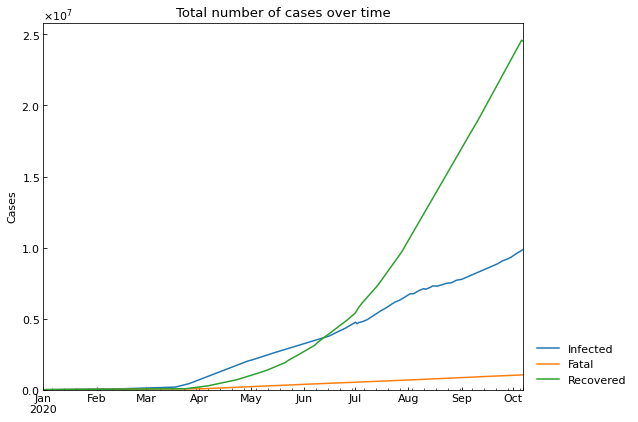

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
237,2020-10-03,85352,5969,1598,77785
238,2020-10-04,85753,5861,1599,78293
239,2020-10-05,86034,5839,1603,78592
240,2020-10-06,86534,5880,1610,79044
241,2020-10-07,87043,85428,1615,77972


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
235,2020-10-03,84768,5371,1590,77807
236,2020-10-04,85339,5427,1597,78315
237,2020-10-05,85739,5531,1599,78609
238,2020-10-06,86047,5374,1602,79071
239,2020-10-07,86543,5262,1605,79676


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
275661,2020-10-03,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275662,2020-10-04,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275663,2020-10-05,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275664,2020-10-06,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275665,2020-10-07,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
235431,COL,Colombia,Vichada,2020-10-03,107808
235432,COL,Colombia,Vichada,2020-10-04,107808
235433,COL,Colombia,Vichada,2020-10-05,107808
235434,COL,Colombia,Vichada,2020-10-06,107808
235435,COL,Colombia,Vichada,2020-10-07,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
275661,2020-10-03,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275662,2020-10-04,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275663,2020-10-05,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275664,2020-10-06,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04
275665,2020-10-07,14,14,0,107808.0,COL,Vichada,Colombia,3,1,2,3,1,0,0,4,2,2,2,62.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
275661,2020-10-03,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
275662,2020-10-04,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
275663,2020-10-05,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
275664,2020-10-06,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04
275665,2020-10-07,Colombia,COL,3,1,2,3,1,0,0,4,2,2,2,62.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
276,2020-10-03,1,1,1,0,0,1,1,1,2,2,1,31.48
277,2020-10-04,1,1,1,0,0,1,1,1,2,2,1,31.48
278,2020-10-05,1,1,1,0,0,1,1,1,2,2,1,31.48
279,2020-10-06,1,1,1,0,0,1,1,1,2,2,1,31.48
280,2020-10-07,1,1,1,0,0,1,1,1,2,2,1,31.48


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
276,2020-10-03,1,1,1,0,0,1,1,1,2,2,1,31.48
277,2020-10-04,1,1,1,0,0,1,1,1,2,2,1,31.48
278,2020-10-05,1,1,1,0,0,1,1,1,2,2,1,31.48
279,2020-10-06,1,1,1,0,0,1,1,1,2,2,1,31.48
280,2020-10-07,1,1,1,0,0,1,1,1,2,2,1,31.48


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

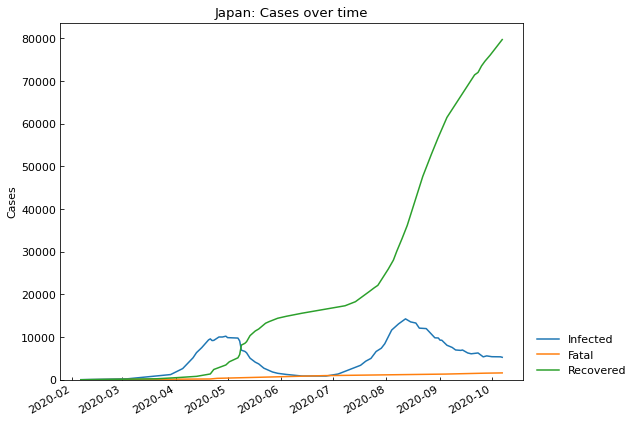

,Date,Confirmed,Infected,Fatal,Recovered
235,2020-10-03,84768,5371,1590,77807
236,2020-10-04,85339,5427,1597,78315
237,2020-10-05,85739,5531,1599,78609
238,2020-10-06,86047,5374,1602,79071
239,2020-10-07,86543,5262,1605,79676


In [26]:
import matplotlib
warnings.simplefilter("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

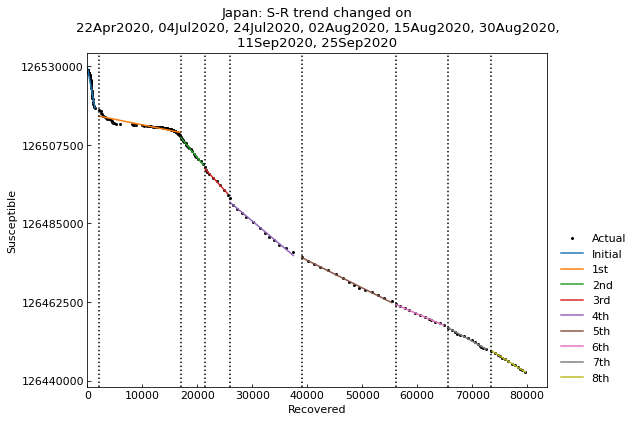

,Type,Start,End,Population
0th,Past,06Feb2020,21Apr2020,126529100
1st,Past,22Apr2020,03Jul2020,126529100
2nd,Past,04Jul2020,23Jul2020,126529100
3rd,Past,24Jul2020,01Aug2020,126529100
4th,Past,02Aug2020,14Aug2020,126529100
5th,Past,15Aug2020,29Aug2020,126529100
6th,Past,30Aug2020,10Sep2020,126529100
7th,Past,11Sep2020,24Sep2020,126529100
8th,Past,25Sep2020,07Oct2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	8th phase (25Sep2020 - 07Oct2020): finished  487 trials in 0 min 15 sec

	3rd phase (24Jul2020 - 01Aug2020): finished  642 trials in 0 min 20 sec

	0th phase (06Feb2020 - 21Apr2020): finished 1553 trials in 1 min  0 sec

	1st phase (22Apr2020 - 03Jul2020): finished 1563 trials in 1 min  0 sec

	2nd phase (04Jul2020 - 23Jul2020): finished 1607 trials in 1 min  0 sec

	7th phase (11Sep2020 - 24Sep2020): finished  183 trials in 0 min  5 sec

	6th phase (30Aug2020 - 10Sep2020): finished  179 trials in 0 min  5 sec

	5th phase (15Aug2020 - 29Aug2020): finished  412 trials in 0 min 10 sec

	4th phase (02Aug2020 - 14Aug2020): finished 1714 trials in 1 min  0 sec

Completed optimization. Total: 1 min 36 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/beta [day],alpha1 [-],1/alpha2 [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,21Apr2020,126529100,SIR-F,5.20,0.018968,0.000063,0.051253,0.009609,720,9,0.019,7886,52,0.944454,1553,1 min 0 sec
1st,Past,22Apr2020,03Jul2020,126529100,SIR-F,0.38,0.062348,0.000767,0.013918,0.033575,720,35,0.062,651,14,0.819038,1563,1 min 0 sec
2nd,Past,04Jul2020,23Jul2020,126529100,SIR-F,2.09,0.001257,0.000046,0.069628,0.033279,720,7,0.001,10928,15,0.042221,1607,1 min 0 sec
3rd,Past,24Jul2020,01Aug2020,126529100,SIR-F,1.85,0.000589,0.000114,0.067612,0.036417,720,7,0.001,4397,13,0.020080,642,0 min 20 sec
4th,Past,02Aug2020,14Aug2020,126529100,SIR-F,1.56,0.000172,0.000176,0.051761,0.033087,720,9,0.000,2840,15,0.061574,1714,1 min 0 sec
5th,Past,15Aug2020,29Aug2020,126529100,SIR-F,0.76,0.000468,0.000552,0.039566,0.051693,720,12,0.000,906,9,0.050953,412,0 min 10 sec
6th,Past,30Aug2020,10Sep2020,126529100,SIR-F,0.71,0.000350,0.000711,0.032127,0.044790,720,15,0.000,702,11,0.018508,179,0 min 5 sec
7th,Past,11Sep2020,24Sep2020,126529100,SIR-F,0.80,0.019691,0.000002,0.038043,0.046677,720,13,0.020,266238,10,0.053356,183,0 min 5 sec
8th,Past,25Sep2020,07Oct2020,126529100,SIR-F,1.00,0.000482,0.000544,0.044229,0.043553,720,11,0.000,918,11,0.014525,487,0 min 15 sec


### Accuracy of estimation

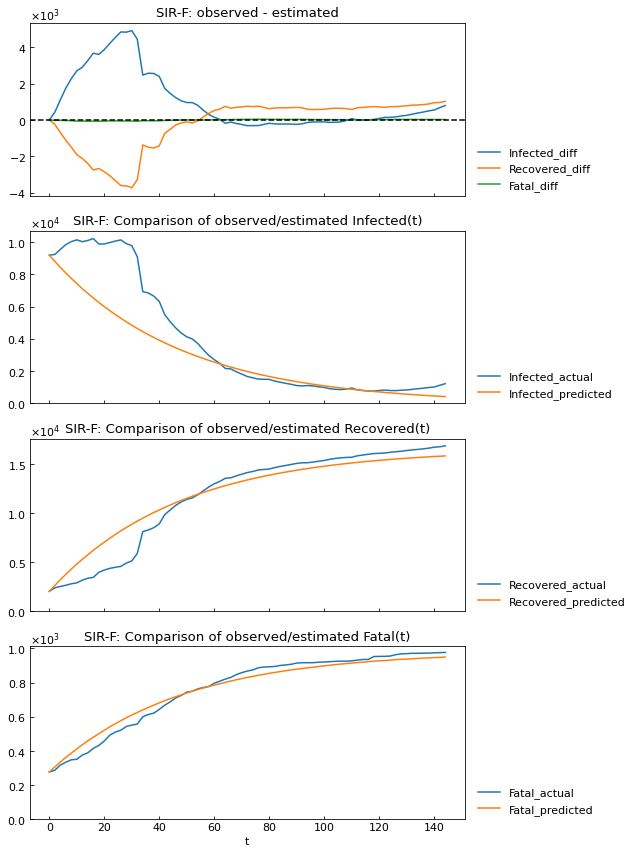

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

1.56

### Show parameter history

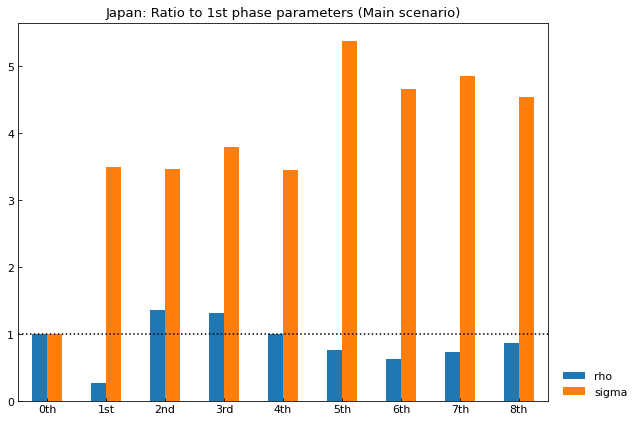

,0th,1st,2nd,3rd,4th,5th,6th,7th,8th
rho,1.0,0.271557,1.358520,1.319186,1.009908,0.771967,0.626839,0.742260,0.86296
sigma,1.0,3.494282,3.463498,3.790072,3.443484,5.379884,4.661443,4.857838,4.53274


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

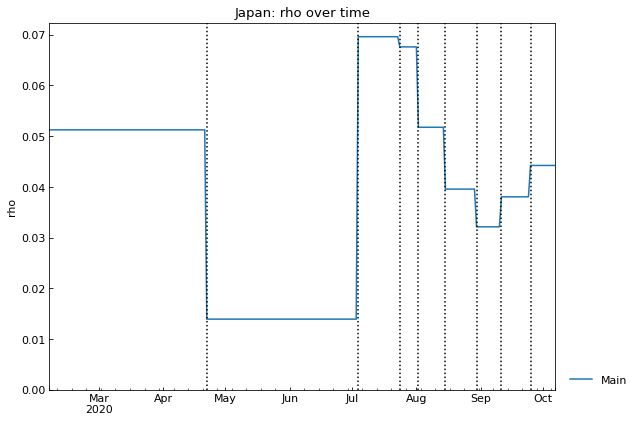

In [33]:
# version >= 2.8.0
_ = scenario.history(target="rho")

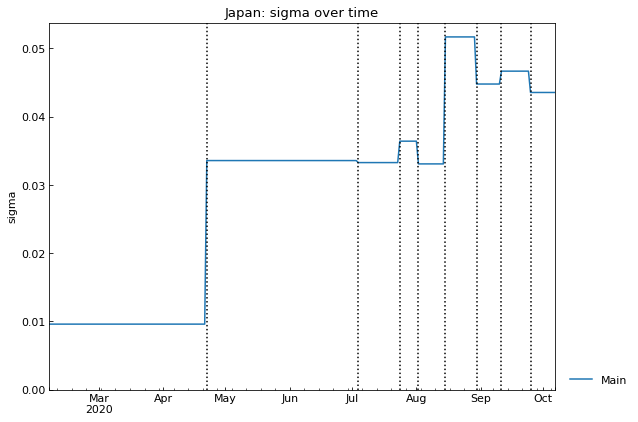

In [34]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

### Show the history of reproduction number

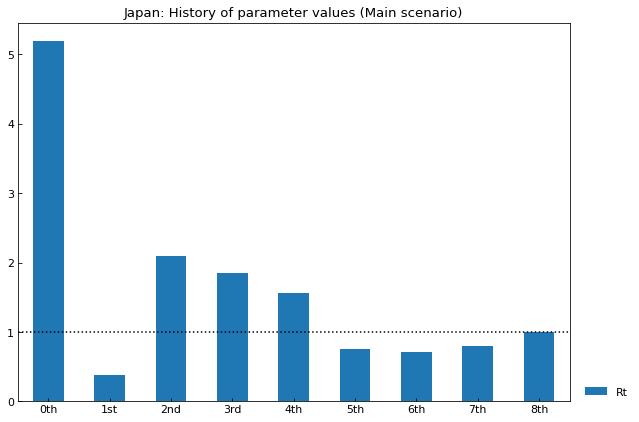

,0th,1st,2nd,3rd,4th,5th,6th,7th,8th
Rt,5.2,0.38,2.09,1.85,1.56,0.76,0.71,0.8,1.0


In [35]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

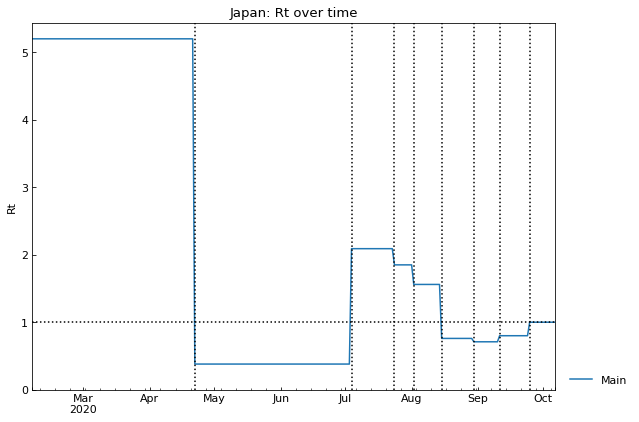

In [36]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

### Simulate the number of cases

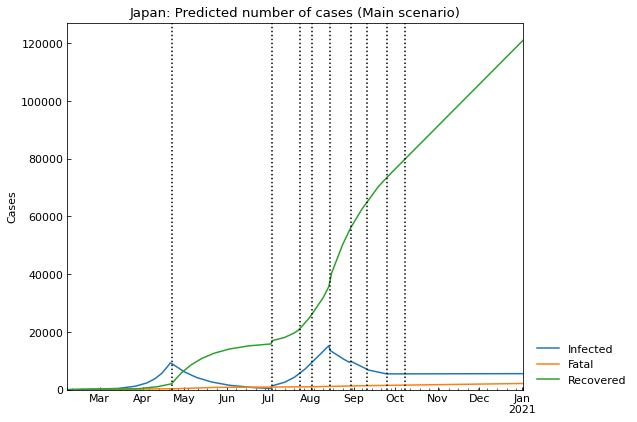

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,126809,2125,5553,119131
328,2020-12-30,127300,2132,5554,119614
329,2020-12-31,127790,2138,5554,120098
330,2021-01-01,128281,2144,5555,120582
331,2021-01-02,128772,2150,5556,121066


In [37]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [38]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.04355326543618781

In [39]:
sigma_new = sigma_current * 2
sigma_new

0.08710653087237562

In [40]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  5.20   
         1st      Past  22Apr2020  03Jul2020   126529100  SIR-F  0.38   
         2nd      Past  04Jul2020  23Jul2020   126529100  SIR-F  2.09   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.85   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.56   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.76   
         6th      Past  30Aug2020  10Sep2020   126529100  SIR-F  0.71   
         7th      Past  11Sep2020  24Sep2020   126529100  SIR-F  0.80   
         8th      Past  25Sep2020  07Oct2020   126529100  SIR-F  1.00   
         9th    Future  08Oct2020  01Jan2021   126529100  SIR-F  1.00   
Medicine 0th      Past  06Feb2020  21Apr2020   126529100  SIR-F  5.20   
         1st      Past  22Apr2020  03Jul2020   126529100  SIR-F  0.38   
         2nd      Past  04Jul2020  23Jul2020   126529100  SIR-F  2.09   
         3rd      Past  24Jul2020  01Aug2020   126529100  SIR-F  1.85   
         4th      Past  02Aug2020  14Aug2020   126529100  SIR-F  1.56   
         5th      Past  15Aug2020  29Aug2020   126529100  SIR-F  0.76   
         6th      Past  30Aug2020  10Sep2020   126529100  SIR-F  0.71   
         7th      Past  11Sep2020  24Sep2020   126529100  SIR-F  0.80   
         8th      Past  25Sep2020  07Oct2020   126529100  SIR-F  1.00   
         9th    Future  08Oct2020  06Nov2020   126529100  SIR-F  1.00   
         10th   Future  07Nov2020  01Jan2021   126529100  SIR-F  0.50   

                   theta     kappa       rho     sigma  tau  1/beta [day]  \
Scenario Phase                                                              
Main     0th    0.018968  0.000063  0.051253  0.009609  720             9   
         1st    0.062348  0.000767  0.013918  0.033575  720            35   
         2nd    0.001257  0.000046  0.069628  0.033279  720             7   
         3rd    0.000589  0.000114  0.067612  0.036417  720             7   
         4th    0.000172  0.000176  0.051761  0.033087  720             9   
         5th    0.000468  0.000552  0.039566  0.051693  720            12   
         6th    0.000350  0.000711  0.032127  0.044790  720            15   
         7th    0.019691  0.000002  0.038043  0.046677  720            13   
         8th    0.000482  0.000544  0.044229  0.043553  720            11   
         9th    0.000482  0.000544  0.044229  0.043553  720            11   
Medicine 0th    0.018968  0.000063  0.051253  0.009609  720             9   
         1st    0.062348  0.000767  0.013918  0.033575  720            35   
         2nd    0.001257  0.000046  0.069628  0.033279  720             7   
         3rd    0.000589  0.000114  0.067612  0.036417  720             7   
         4th    0.000172  0.000176  0.051761  0.033087  720             9   
         5th    0.000468  0.000552  0.039566  0.051693  720            12   
         6th    0.000350  0.000711  0.032127  0.044790  720            15   
         7th    0.019691  0.000002  0.038043  0.046677  720            13   
         8th    0.000482  0.000544  0.044229  0.043553  720            11   
         9th    0.000482  0.000544  0.044229  0.043553  720            11   
         10th   0.000482  0.000544  0.044229  0.087107  720            11   

                alpha1 [-]  1/alpha2 [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                
Main     0th         0.019            7886             52   0.944454   1553   
         1st         0.062             651             14   0.819038   1563   
         2nd         0.001           10928             15   0.042221   1607   
         3rd         0.001            4397             13  0.0200801    642   
         4th         0.000            2840             15  0.0615738   1714   
         5th 

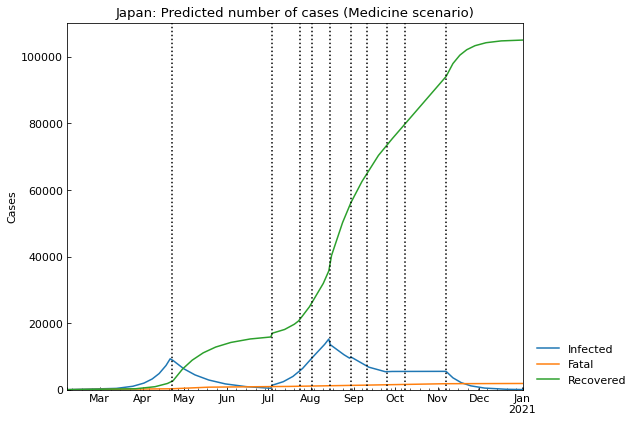

,Date,Confirmed,Fatal,Infected,Recovered
327,2020-12-29,106921,1871,60,104990
328,2020-12-30,106926,1871,55,105000
329,2020-12-31,106931,1871,51,105009
330,2021-01-01,106935,1871,46,105018
331,2021-01-02,106940,1871,43,105026


In [41]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [42]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,10th_Rt
Main,15223,14Aug2020,5556,2150,-
Medicine,15223,14Aug2020,43,1871,0.5


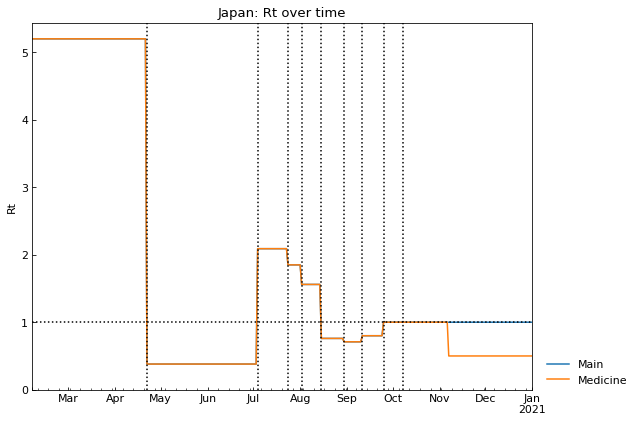

In [43]:
# version >= 2.8.0
_ = scenario.history(target="Rt")

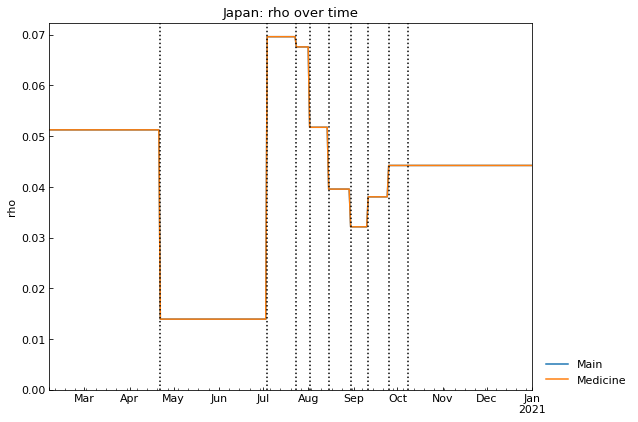

In [44]:
# version >= 2.8.0
_ = scenario.history(target="rho")

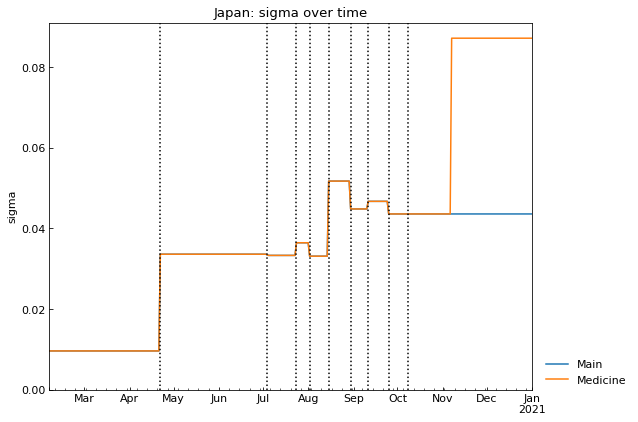

In [45]:
# version >= 2.8.0
_ = scenario.history(target="sigma")

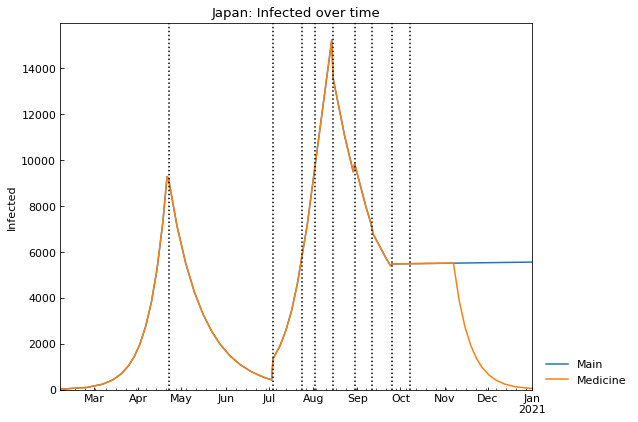

In [46]:
# version >= 2.8.0
_ = scenario.history(target="Infected")